In [14]:
from scipy.cluster.vq import kmeans,vq,whiten
import matplotlib.pyplot as plt

In [21]:
from numpy import vstack,array
from numpy.random import rand

# data generation with three features
data = vstack((rand(100,3) + array([.5,.5,.5]),rand(100,3)))
print(data)


[[ 1.46258594  1.06037459  0.95978798]
 [ 0.70865228  0.63017038  0.73483862]
 [ 0.86814763  0.79130455  1.35265651]
 [ 1.20147154  0.88940757  1.37804339]
 [ 1.37770396  0.6187063   1.03735272]
 [ 1.00599227  1.02651841  0.73090393]
 [ 0.76178978  1.24391306  0.84365605]
 [ 1.21006291  1.43900081  1.24604719]
 [ 0.96221229  1.03821773  1.09545161]
 [ 1.41564195  0.55230483  0.93525697]
 [ 0.66853272  0.83979202  1.29642369]
 [ 0.59780126  1.09801153  1.48931364]
 [ 0.51288855  0.52161678  1.13134641]
 [ 1.42603233  1.46211863  0.80819085]
 [ 0.90797838  0.55263562  0.583061  ]
 [ 1.10610055  1.37968803  1.11824164]
 [ 0.95835709  1.41526425  1.04950237]
 [ 0.79512925  1.16337478  0.53868121]
 [ 0.57986019  1.24624349  0.56537689]
 [ 1.31587176  1.32923496  1.48486027]
 [ 0.74511123  0.60735029  1.3774119 ]
 [ 1.37884257  0.83950782  1.28280725]
 [ 0.69268585  0.95536267  0.50003765]
 [ 0.84031496  0.59983893  1.15921271]
 [ 0.91531397  0.87594462  0.69059647]
 [ 0.63644302  0.98471746

In [4]:
# whitening of data.it is beneficial to rescale each feature dimension of the observation set with whitening.
# Each feature is divided by its standard deviation across all observations to give it unit variance
data = whiten(data)

In [17]:
# computing K-Means with K = 3 (2 clusters)
centroids,_ = kmeans(data,2)
print(centroids)

[[ 0.53848329  0.52668805  0.54796288]
 [ 1.03872139  1.05968571  0.99898412]]


[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1
 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


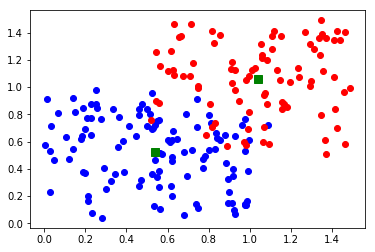

In [19]:
# assign each sample to a cluster
clx,_ = vq(data,centroids)
print(clx)


# some plotting using numpy's logical indexing
plt.plot(data[clx==0,0],data[clx==0,1],'ob',
     data[clx==1,0],data[clx==1,1],'or')
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
plt.show()

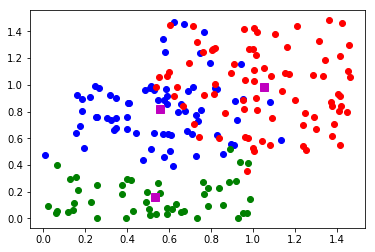

In [22]:
# now with K = 3 (3 clusters)
centroids,_ = kmeans(data,3)
idx,_ = vq(data,centroids)

plt.plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'or',
     data[idx==2,0],data[idx==2,1],'og') # third cluster points
plt.plot(centroids[:,0],centroids[:,1],'sm',markersize=8)
plt.show()

/home/gabriel/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/gabriel/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


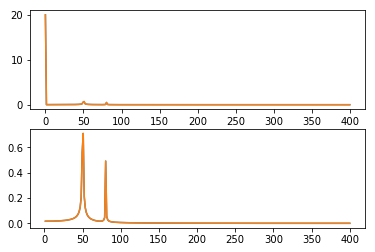

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = 10 + np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

plt.subplot(2, 1, 1)
plt.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
plt.subplot(2, 1, 2)
plt.plot(xf[1:], 2.0/N * np.abs(yf[0:N/2])[1:])
plt.show()

In [3]:
import numpy as np
from scipy.integrate import simps
from numpy import trapz

# The y values.  A numpy array is used here,
# but a python list could also be used.
y = np.array([5, 20, 4, 18, 19, 18, 7, 4])

# Compute the area using the composite trapezoidal rule.
area = trapz(y, dx=5)
print("area =", area)

# Compute the area using the composite Simpson's rule.
area = simps(y, dx=5)
print("area =", area)

area = 452.5
area = 460.0


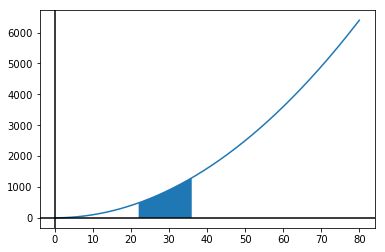

(12044.666666666668, 1.337226625726847e-10)


In [7]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

def f(t):
    return t**2 + 3

t = np.arange(0,80,1/40.)
plt.plot(t,f(t))

section = np.arange(22, 36, 1/20.)
plt.fill_between(section,f(section))

plt.axhline(0, color='k')
plt.axvline(0, color='k')
plt.show()

i = integrate.quad(f, 22, 36)
print(i)

In [ ]:
import scipy.integrate
from numpy import exp
from math import sqrt
f = lambda x, y : 16*x*y
g = lambda x : 0
h = lambda y : sqrt(1-4*y**2)
i = scipy.integrate.dblquad(f, 0, 0.5, g, h)
print(i)

In [9]:
#importing the scipy and numpy packages
from scipy import linalg
import numpy as np

#Declaring the numpy arrays
a = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])

#Passing the values to the solve function
x = linalg.solve(a, b)

#printing the result array
print( x)

[ 2. -2.  9.]


In [10]:
#importing the scipy and numpy packages
from scipy import linalg
import numpy as np

#Declaring the numpy array
A = np.array([[1,2],[3,4]])

#Passing the values to the det function
x = linalg.det(A)

#printing the result
print( x)

-2.0


In [12]:
#importing the scipy and numpy packages
from scipy import linalg
import numpy as np

#Declaring the numpy array
A = np.array([[1,2],[3,4]])

#Passing the values to the eig function
l, v = linalg.eig(A)

#printing the result for eigen values
print(l)

#printing the result for eigen vectors
print (v)

[-0.37228132+0.j  5.37228132+0.j]
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


In [2]:
import numpy as np
from scipy.optimize import root
def func(x):
   return x*2 + 2 * np.cos(x)
sol = root(func, 0.3)
print (sol)

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-2.77666778e-12])
       r: array([-3.3472241])
  status: 1
 success: True
       x: array([-0.73908513])


In [3]:
import numpy as np
from scipy.optimize import bisect

def func(x):
   return x*2 + 2 * np.cos(x)
sol = bisect(func, -1,np.pi)
print (sol)

-0.7390851332143105


[ 0.          0.36363636  0.72727273  1.09090909  1.45454545  1.81818182
  2.18181818  2.54545455  2.90909091  3.27272727  3.63636364  4.        ] [-0.65364362 -0.61966189 -0.51077021 -0.31047698 -0.00715476  0.37976236
  0.76715099  0.99239518  0.85886263  0.27994201 -0.52586509 -0.99582185]


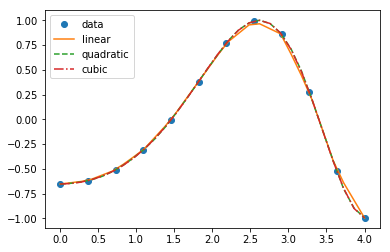

In [1]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
x = np.linspace(0, 4, 12)
y = np.cos(x**2/3+4)
print(x,y)

f1 = interpolate.interp1d(x, y,kind = 'linear')

f2 = interpolate.interp1d(x, y, kind = 'quadratic')

f3 = interpolate.interp1d(x, y, kind = 'cubic')

xnew = np.linspace(0, 4,30)

plt.plot(x, y, 'o', xnew, f1(xnew), '-', xnew, f2(xnew), '--',xnew, f3(xnew), '-.')

plt.legend(['data', 'linear','quadratic', 'cubic','nearest'], loc = 'best')

plt.show()

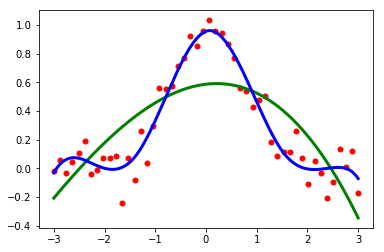

In [22]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
x = np.linspace(-3, 3, 50)
y = np.exp(-x**2) + 0.1 * np.random.randn(50)
plt.plot(x, y, 'ro', ms = 5)
spl = UnivariateSpline(x, y)
xs = np.linspace(-3, 3, 1000)
plt.plot(xs, spl(xs), 'g', lw = 3)
spl.set_smoothing_factor(0.5)
plt.plot(xs, spl(xs), 'b', lw = 3)
plt.show()